# 목차
1. 분석의 방향
2. 데이터 Overview
3. 중복 제거
4. 결측치 제거
5. 데이터 형식 변환
6. 이상치 제거
7. 상관관계 및 그래프 분석
------------
# 1. 분석의 방향
+ 각 시간대별 수요의 경향은 어떻게 나타날 것인가?
  + 대부분의 사람들의 수요에 따라 시간대별 새로운 기본 요금을 책정할 수 있을 것이다.
+ 주행거리에 따라 팁 금액이 늘 것인가?
+ 톨게이트 비용이 발생한다면(장거리 혹은 특정 구간을 지나는 것으로 추정) 팁 금액이 늘 것인가?

-------------
# 2. 데이터 Overview

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

taxi_df = pd.read_csv('trip.csv')
taxi_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [52]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [53]:
taxi_df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [54]:
taxi_df.isna().agg(['sum','mean'])

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
sum,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.000132,0.0,0.0


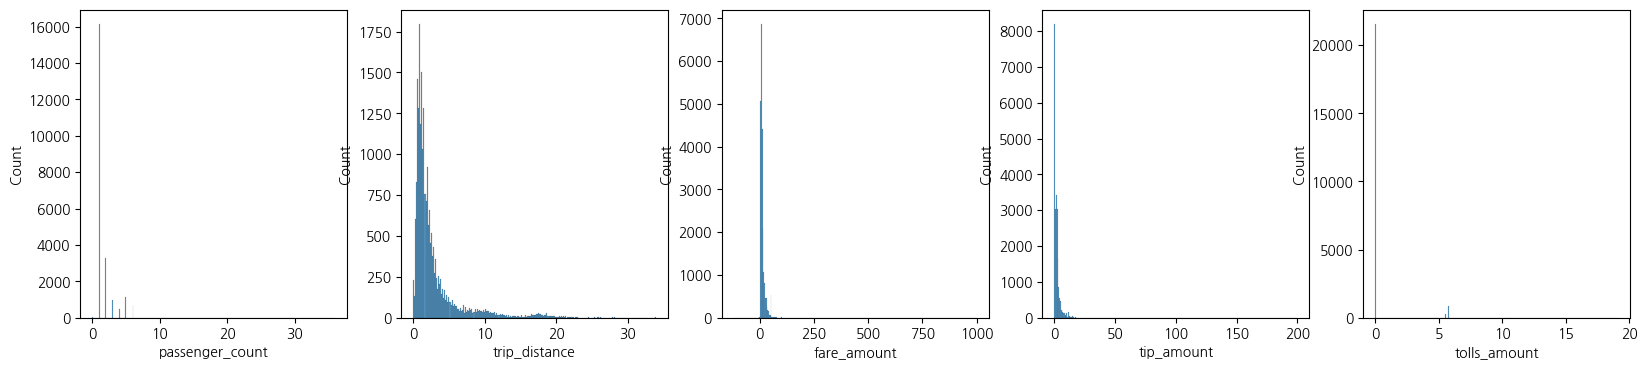

In [55]:
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)
sns.histplot(taxi_df, x='passenger_count', ax=ax1)
sns.histplot(taxi_df, x='trip_distance', ax=ax2)
sns.histplot(taxi_df, x='fare_amount', ax=ax3)
sns.histplot(taxi_df, x='tip_amount', ax=ax4)
sns.histplot(taxi_df, x='tolls_amount', ax=ax5)
plt.show()

In [56]:
sns.scatterplot(taxi_df, x='tolls_amount', ax=ax5)

<Axes: xlabel='tolls_amount', ylabel='Count'>

## 데이터 설명
데이터는 **22701행 9열**의 형태로 이루어져있으며, 각 열은 다음과 같습니다.
1. 고객명
2. 탑승 시간
3. 하차 시간
4. 결제 수단
5. 승객 수
6. 운행 거리
7. 주행 요금
8. 팁 금액
9. 톨게이트 요금
</br>

+ 결측치  
  '주행 요금'의 항목에서 결측치가 **3개**가 발견되었으며, 이는 **1% 미만**의 비율이기 때문에 데이터에 영향이 없을 것으로 판단됩니다.  

+ 데이터 형식  
  1~4의 값이 'object'이기에 값이 일관된 속성을 가지고 있지 않을 가능성이 있습니다.  
  그러므로, 데이터 형식을 맞추는 것과 동시에 발견되는 결측치에 대해 처리할 예정입니다.

  **목표 데이터 형식**  
  + 고객명 : 문자열
  + 탑승 시간 : 시간
  + 하차 시간 : 시간
  + 결제 수단 : 원-핫 인코딩(불린)
</br>

+ 이상치
  + 승객 수 : 0, 36
  + 운행 거리 : 0
  + 주행 요금 : -120, 999


-------------------
# 3. 중복 데이터 제거

In [57]:
taxi_df[taxi_df.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [58]:
taxi_df = taxi_df.drop_duplicates()

--------------------
# 4. 결측치 제거

In [59]:
taxi_df[taxi_df['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [60]:
taxi_df.drop(taxi_df[taxi_df['fare_amount'].isna()].index, inplace=True)

--------------
# 5. 데이터 형식 변환

In [61]:
# 고객 이름
taxi_df['passenger_name'] = taxi_df['passenger_name'].astype('string')
# 승하차 시간
taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])
taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])
# 결제 수단
taxi_df['payment_method'] = taxi_df['payment_method'].astype('string')

In [62]:
# 탑승 시간대 피쳐 생성
taxi_df['pickup_hour']=taxi_df['tpep_dropoff_datetime'].dt.hour
# 주행 시간 피쳐 생성
taxi_df['trip_time']=taxi_df['tpep_dropoff_datetime']-taxi_df['tpep_pickup_datetime']
taxi_df['trip_time(min)'] = taxi_df['trip_time'].dt.total_seconds() / 60
# 탑승 시간, 하차 시간 drop
taxi_df=taxi_df.drop(['tpep_dropoff_datetime','tpep_pickup_datetime'],axis=1)

In [63]:
# 총 요금 피쳐 생성
taxi_df['in_total'] = taxi_df['fare_amount']+taxi_df['tip_amount']+taxi_df['tolls_amount']

**고객 이름**에 대해서는 더 확인해봐야하지만,  
**승하차 시간**의 형식 변환에 오류가 발생하지 않은 것으로 보아 날짜 형식을 모두 갖춘 것으로 보입니다.

탑승 시간과 하차 시간을 이용하여 새로운 파생 변수를 만들어 분석에 이용하고자, '**주행 시간**'이라는 새로운 피쳐를 생성하였습니다.  
또한, 주로 고객이 이용하는 시간대를 확인하기 위하여 '**탑승 시간대**'라는 새로운 피쳐를 생성하였습니다.

현재 분석에 필요한 데이터를 '**탑승 시간**','**하차 시간**'을 통해 얻어냈으므로 해당 열을 제거하였습니다.

**결제 수단**의 경우,
1. 현금
2. 신용 카드
3. 체크 카드

위와 같은 경우의 수가 존재했으며, 이를 데이터화 시키기 위해서 원-핫 인코딩을 진행하였습니다.

**총 요금** 피쳐를 생성하여 **주행요금 + 팁 금액 + 톨게이트 요금**을 나타낼 수 있게 하였습니다.

-----------
# 6. 이상치 제거 및 수정
### 고객명

In [64]:
taxi_df['passenger_name'].sort_values()
# A-Z로 시작하는 이름들이 분포, 숫자나 특수 기호로 시작하는 이름은 없음

21359         Aaron Allen
6263        Aaron Andrews
14517     Aaron Armstrong
9075        Aaron Brennan
16500      Aaron Campbell
               ...       
14725    Zachary Williams
19489       Zachary Woods
828         Zachary Young
18063          Zoe Dorsey
5700           Zoe Larson
Name: passenger_name, Length: 22696, dtype: string

In [65]:
taxi_df['passenger_name'].apply(len).value_counts().sort_index()
# 이름의 길이가 7~28 까지 존재

passenger_name
7       16
8      128
9      531
10    1549
11    2881
12    3793
13    4207
14    3514
15    2469
16    1727
17     933
18     465
19     218
20     119
21      60
22      40
23      19
24      12
25      13
27       1
28       1
Name: count, dtype: int64

In [66]:
taxi_df[(taxi_df['passenger_name'].apply(len) <= 7)|(taxi_df['passenger_name'].apply(len) >=24)]['passenger_name']
# 이름에 각종 접두사, 접미사가 붙은 것을 확인

305         Mr. Reginald Phillips PhD
490          Mr. Alexander Johnson MD
1067                          Mary Yu
1549        Mrs. Theresa Campbell DDS
1941         Dr. Michael Williams DDS
2781        Mr. Christian Johnson III
3400                          Pam Lee
3818                          Jo Vang
4070                          Amy Roy
4096         Mrs. Kendra Griffith DDS
4158                          Mark Li
4831     Dr. Nicholas Christensen DVM
5858                          Lisa Le
6225        Mrs. Elizabeth Larsen DVM
7926         Dr. Christina Hughes DDS
8186        Mr. Kenneth Wilkerson Jr.
8703                          Lisa Wu
8791        Dr. Jennifer Thompson DDS
8799         Ms. Jennifer Bennett DVM
9024         Dr. Brittany Gonzalez MD
9902                          Kurt Le
10564                         Anna Le
10897       Mrs. Victoria Swanson DVM
11087        Mrs. Alexandra Whitehead
11563       Mr. Christopher Hughes II
12279       Mrs. Jennifer Garrett PhD
12433     Mr

In [67]:
taxi_df[taxi_df['passenger_name'].str.contains(r'[^a-zA-Z ]',regex=True)]
# 온점(.)을 기준으로 접두사와 접미사가 존재하며, 세대를 나타내는 접미사도 발견

,passenger_name,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pickup_hour,trip_time,trip_time(min),in_total
43,Dr. Christy Velasquez,Cash,1,4.52,16.5,2.00,0.0,8,0 days 00:16:21,16.350000,18.50
90,Mr. Paul Owens,Cash,1,9.60,30.5,0.00,0.0,18,0 days 00:26:56,26.933333,30.50
100,Dr. Daniel Davidson,Cash,1,1.42,7.0,0.00,0.0,23,0 days 00:07:31,7.516667,7.00
155,Mrs. Cynthia Williams,Cash,1,2.80,20.5,3.20,0.0,11,0 days 00:33:43,33.716667,23.70
167,Mrs. Sarah Burke MD,Cash,1,0.84,6.5,0.00,0.0,19,0 days 00:07:49,7.816667,6.50
...,...,...,...,...,...,...,...,...,...,...,...
22295,Mr. Brian Moran,Credit Card,1,6.20,22.5,5.80,0.0,10,0 days 00:23:00,23.000000,28.30
22306,Mrs. Cathy Sanchez,Cash,1,1.11,8.5,1.96,0.0,2,0 days 00:10:41,10.683333,10.46
22457,Mr. Christian Campbell IV,Credit Card,3,4.24,15.5,3.36,0.0,20,0 days 00:15:19,15.316667,18.86
22502,Mr. Brian Edwards,Debit Card,1,2.43,12.0,1.33,0.0,20,0 days 00:15:50,15.833333,13.33


--------------------------------
### 주행 시간

In [68]:
taxi_df['trip_time(min)'].value_counts().sort_index()

trip_time(min)
-16.983333       1
 0.000000       26
 0.016667        3
 0.033333       11
 0.050000       18
                ..
 1438.550000     1
 1438.650000     1
 1438.850000     1
 1439.150000     1
 1439.550000     1
Name: count, Length: 3025, dtype: int64

In [69]:
# 주행 시간이 30초 이하의 수 161
len(taxi_df[taxi_df['trip_time(min)'] <= 0.5])

161

In [70]:
taxi_df[taxi_df['trip_time(min)'] >= 60*6][['trip_time(min)','fare_amount']].sort_values('trip_time(min)')

,trip_time(min),fare_amount
13221,689.883333,36.0
11887,736.050000,50.5
8197,1298.883333,13.5
7171,1386.800000,6.5
17396,1391.733333,9.5
13149,1392.050000,10.0
4602,1394.883333,10.0
12946,1395.683333,-120.0
1357,1399.400000,15.0
5480,1399.983333,5.5


In [71]:
# 주행 시간이 6시간 이상인 수 44
len(taxi_df[taxi_df['trip_time(min)'] >= 60*6])

44

In [72]:
# 주행 시간이 30초 이하 혹은 6시간 이상인 운행의 수 205
outlier_taxi = taxi_df[(taxi_df['trip_time(min)'] <= 0.5)|(taxi_df['trip_time(min)'] >= 60*6)]
outlier_taxi.head()

,passenger_name,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pickup_hour,trip_time,trip_time(min),in_total
129,Linda Kaufman,Debit Card,1,0.00,20.0,0.0,0.0,8,0 days 00:00:07,0.116667,20.0
248,Erik Perez,Cash,1,0.00,2.5,0.0,0.0,20,0 days 00:00:10,0.166667,2.5
293,Deborah Sanford,Cash,1,0.00,2.5,0.0,0.0,19,0 days 00:00:26,0.433333,2.5
316,Tiffany Johnson,Cash,6,0.12,-2.5,0.0,0.0,2,0 days 00:00:29,0.483333,-2.5
321,Ryan Hughes,Cash,1,0.00,2.5,0.0,0.0,4,0 days 00:00:09,0.150000,2.5


In [73]:
# 1% 미만의 데이터 제거
taxi_df=taxi_df.drop(outlier_taxi.index)

---------------------
### 승객 수

In [74]:
taxi_df['passenger_count'].value_counts(normalize=True).sort_index()*100
# 0, 36 은 이상이 있는 값
# 합쳐도 1%가 안 되기 때문에 drop

passenger_count
0      0.142279
1     70.961718
2     14.592504
3      4.197234
4      1.991908
5      5.064248
6      3.045663
36     0.004446
Name: proportion, dtype: float64

In [75]:
# 0이거나 36명인 행
passenger_outlier = taxi_df[(taxi_df['passenger_count'] == 0)|(taxi_df['passenger_count']==36)]
taxi_df=taxi_df.drop(passenger_outlier.index,axis=0)
taxi_df['passenger_count'].value_counts().sort_index()

passenger_count
1    15960
2     3282
3      944
4      448
5     1139
6      685
Name: count, dtype: int64

--------------------
### 운행 거리

In [76]:
taxi_df['trip_distance'].value_counts().sort_index()
# 37개의 0 발견
# 0.64%의 비율 drop

trip_distance
0.00     37
0.01      1
0.02      2
0.03      2
0.04      3
         ..
30.83     1
31.95     1
32.72     1
33.92     1
33.96     1
Name: count, Length: 1542, dtype: int64

In [77]:
'''
# 0을 제외한 분포 그래프
sns.barplot(x= taxi_df[taxi_df['trip_distance']!=0]['trip_distance'].value_counts().index, y = taxi_df[taxi_df['trip_distance']!=0]['trip_distance'].value_counts())
# 오른쪽 꼬리가 긴 형태이므로 평균으로 할 시 결과가 왜곡될 수 있음. 결측치를 중앙값으로 대체
distance_outlier=taxi_df[taxi_df['trip_distance']==0].index # 향후 값의 fare 피쳐와의 상관관계를 따져보기 위하여 인덱스 기억
taxi_df.loc[distance_outlier,'trip_distance']=taxi_df[taxi_df['trip_distance']!=0]['trip_distance'].median()
'''
pass

In [78]:
distance_outlier = taxi_df[taxi_df['trip_distance']==0]
taxi_df=taxi_df.drop(distance_outlier.index,axis=0)
taxi_df['trip_distance'].value_counts().sort_index()

trip_distance
0.01     1
0.02     2
0.03     2
0.04     3
0.05     1
        ..
30.83    1
31.95    1
32.72    1
33.92    1
33.96    1
Name: count, Length: 1541, dtype: int64

--------------------
### 주행 요금

In [79]:
taxi_df['fare_amount'].value_counts().sort_index()
# 음수의 요금 발견
# 999.99 값의 요금 발견

fare_amount
-4.50      2
-4.00      2
-3.50      3
-3.00      2
-2.50      1
          ..
 140.00    1
 150.00    1
 152.00    1
 200.01    1
 999.99    1
Name: count, Length: 172, dtype: int64

In [80]:
print(len(taxi_df[taxi_df['fare_amount'] <= 0]))
print(len(taxi_df[taxi_df['fare_amount'] >= 500]))
# 14개의 이상치 drop 

13
1


In [81]:
fare_outlier = taxi_df[(taxi_df['fare_amount'] <= 0)|(taxi_df['fare_amount'] >= 500)]
taxi_df=taxi_df.drop(fare_outlier.index,axis=0)
taxi_df['fare_amount'].value_counts().sort_index()

fare_amount
0.01        1
2.50       11
3.00       89
3.50      293
4.00      548
         ... 
131.00      1
140.00      1
150.00      1
152.00      1
200.01      1
Name: count, Length: 165, dtype: int64

--------------
# 팁

In [82]:
taxi_df['tip_amount'].value_counts().sort_index()
# 팁은 얼마를 주든 자유, 결측치만 없으면

tip_amount
0.00     7873
0.01        8
0.02        4
0.03        1
0.04        1
         ... 
25.20       1
28.00       1
42.29       1
51.64       1
55.50       1
Name: count, Length: 727, dtype: int64

In [83]:
taxi_df['tip_amount'].isna().sum()
# 결측치 없음

np.int64(0)

-----------------------
# 톨비

In [84]:
taxi_df['tolls_amount'].value_counts().sort_index()

tolls_amount
0.00     21256
2.16         1
2.54         6
2.64        10
2.70         1
4.32         1
5.16         1
5.44         1
5.45         1
5.49         1
5.54       234
5.76       834
6.00         1
6.32         1
8.00         1
8.16         1
8.40         1
8.50         2
10.50       21
11.52        2
12.50       10
13.00        1
15.00        1
15.50        2
15.58        1
16.00        2
16.20        1
16.26        3
16.50        2
16.62        1
17.28        1
17.50        1
18.00        1
18.26        1
18.28        1
19.10        1
Name: count, dtype: int64

In [85]:
taxi_df['tolls_amount'].isna().sum()

np.int64(0)

---------------
## 요약

+ 고객명  
  모든 이름은 대문자 알파벳으로 시작하고 길이가 7~28 까지 존재하며, 다음과 같은 문제가 있음을 발견하였습니다.
  1. 접두사 ['Mr.','Ms.','Mrs.','Dr.']
  2. 접미사 ['Jr.','Sr.','I','II','III','IV','V','VI']
 
  데이터 관리를 위해서는 이와 같은 문제를 해결해야 하는 것이 맞지만, 이번 분석에서 **고객 이름**은 결과에 영향을 끼치지 않으므로 제거하지 않았습니다.
+ 주행시간  
  주행 시간이 1분 이하인 자료는 잘못 표기된 자료이거나, 데이터의 상관관계를 충분히 표현하지 못하는 값으로 판단하였습니다.  
  또한 6시간 이상의 값은 주행 요금을 충분히 설명하지 못하는 값이라고 판단하여 제거하였습니다.

  주행 시간이 1분 이하 값의 수는 161행이며, 6시간 이상 값의 수는 44행입니다.  
  총 205행이 삭제 대상이며, 이는 전체 데이터의 1% 미만이기에 큰 영향이 없다고 판단하였습니다.
+ 승객 수  
  승객의 수가 0이거나 36명인 데이터는 기본적인 상식을 바탕으로도 불가능한 데이터이므로 제거하였습니다.  
제거한 데이터의 비율은 1% 미만입니다.
+ 운행 거리  
  **주행 거리**에서는 0 miles 의 값이 37개가 존재했으며, 이는 잘못 기입했거나 0.01 미만의 데이터가 입력된 것이라고 판단하여 삭제하였습니다.
+ 주행 요금  
  **요금** 속성에서는 0 이하의 값이 13개, 500 이상의 값이 1개 존재하여 삭제하였습니다.
+ 팁 금액, 톨게이트 비용  
  팁과 톨게이트 비용은 모두 상황에 따라 다르므로 이상치가 없다고 판단하였습니다.

#### **총 제거 행** : 294행
#### **제거된 비율** : 약 1.3%
#### **현재 데이터 행의 개수** : 22407행

------------------
# 7. 상관관계 및 그래프 분석

In [86]:
taxi_df = taxi_df.rename({'passenger_name':'고객명','payment_method':'결제수단','passenger_count':'고객 수','trip_distance':'주행거리','fare_amount':'주행요금','tip_amount':'팁','tolls_amount':'톨비','pickup_hour':'탑승시간대','trip_time(min)':'주행시간(분)','in_total':'총요금','payment_method':'결제수단'},axis=1)
taxi_df = taxi_df[['총요금','팁','톨비','주행요금','주행거리','탑승시간대','주행시간(분)','고객 수','결제수단','고객명']]

-------------------
### 상관관계

<Axes: >

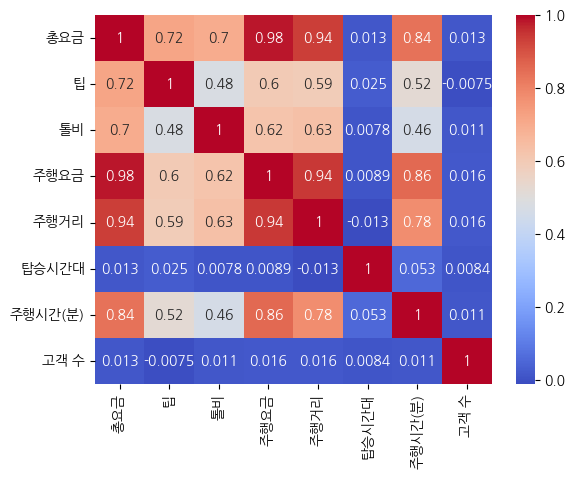

In [87]:
sns.heatmap(taxi_df.corr(numeric_only=True), annot=True, cmap='coolwarm')

--------------
### 데이터 개선점

<Axes: xlabel='주행거리', ylabel='주행요금'>

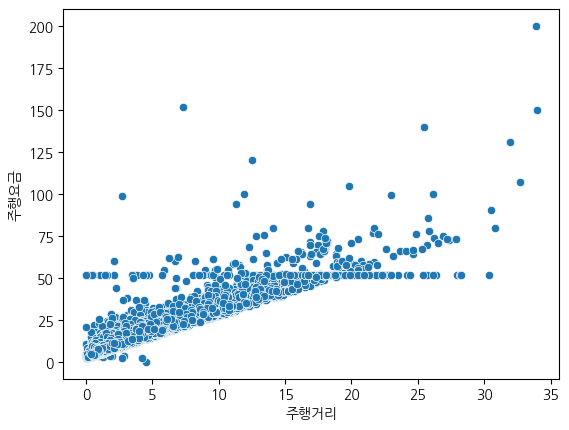

In [88]:
# '주행 거리'와 '요금'은 거의 선형관계에 있다.
# '주행 거리'가 적어도 '요금'은 클 가능성 있음(톨비, 교통상황 등). 그러나 '주행 거리'가 길어짊에도 '요금'이 적은 것은 문제가 있다.
sns.scatterplot(taxi_df[['주행거리','주행요금']],x='주행거리',y='주행요금')

In [89]:
taxi_df[(taxi_df['주행거리']>4)&(taxi_df['주행요금'] <3)]
# 2개의 이상치 발견
# 주행거리가 증가하는데 요금이 증가하지 않는 것이 설명이 불가능

,총요금,팁,톨비,주행요금,주행거리,탑승시간대,주행시간(분),고객 수,결제수단,고객명
4063,10.51,0.0,10.5,0.01,4.5,21,29.35,4,Cash,Phillip Gonzalez
15501,2.50,0.0,0.0,2.50,4.2,21,0.75,1,Cash,Julie Ferguson


In [90]:
taxi_df=taxi_df.drop(taxi_df[(taxi_df['주행거리']>4)&(taxi_df['주행요금'] <3)].index)

<Axes: xlabel='주행시간(분)', ylabel='주행거리'>

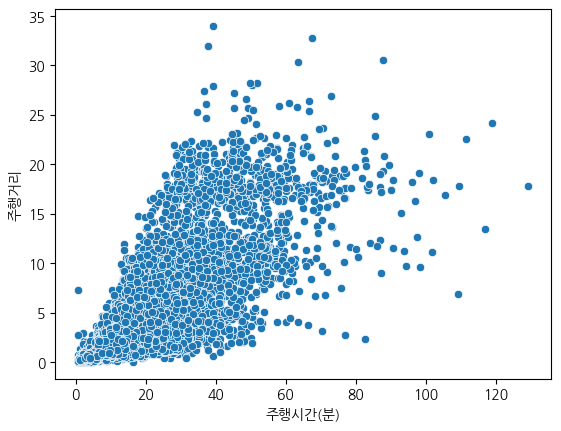

In [109]:
sns.scatterplot(taxi_df,x='주행시간(분)',y='주행거리')

In [43]:
taxi_df[(taxi_df['주행시간(분)']>100)&(taxi_df['주행거리']<1)]
# 주행시간이 100분인데 주행거리가 0에 가까운 데이터가 설명 불가능

,총요금,팁,톨비,주행요금,주행거리,탑승시간대,주행시간(분),고객 수,결제수단,고객명
2476,62.56,10.56,0.0,52.0,0.21,20,101.4,1,Credit Card,Sierra Vargas


In [97]:
taxi_df=taxi_df.drop(taxi_df[(taxi_df['주행시간(분)']>100)&(taxi_df['주행거리']<1)].index)
# 100분이 넘어감에도 주행거리가 1도 안되는 값 제거
taxi_df=taxi_df.drop(taxi_df[taxi_df['주행시간(분)']>300].index)
# 주행시간이 5시간이 넘어감에도 주행거리가 그에 비례에서 오르지 않기 때문에 설명이 부족함 -> 제거

-----------------
### 시각화 개선점

In [115]:
taxi_df=taxi_df.drop(taxi_df[taxi_df['주행시간(분)']>150].index)
taxi_df=taxi_df.drop(taxi_df[taxi_df['총요금']>170].index)
taxi_df=taxi_df.drop(taxi_df[taxi_df['팁']>40].index)
# 설명이 안 되지는 않지만 너무 값이 커서 시각화에 문제가 되기 때문에 제거
# 현재 관점이 모델링이 아니기 때문에 시각화에서 제거를 한 후, 모델링에서는 제거 전의 데이터를 사용할 것

----------
### 그래프

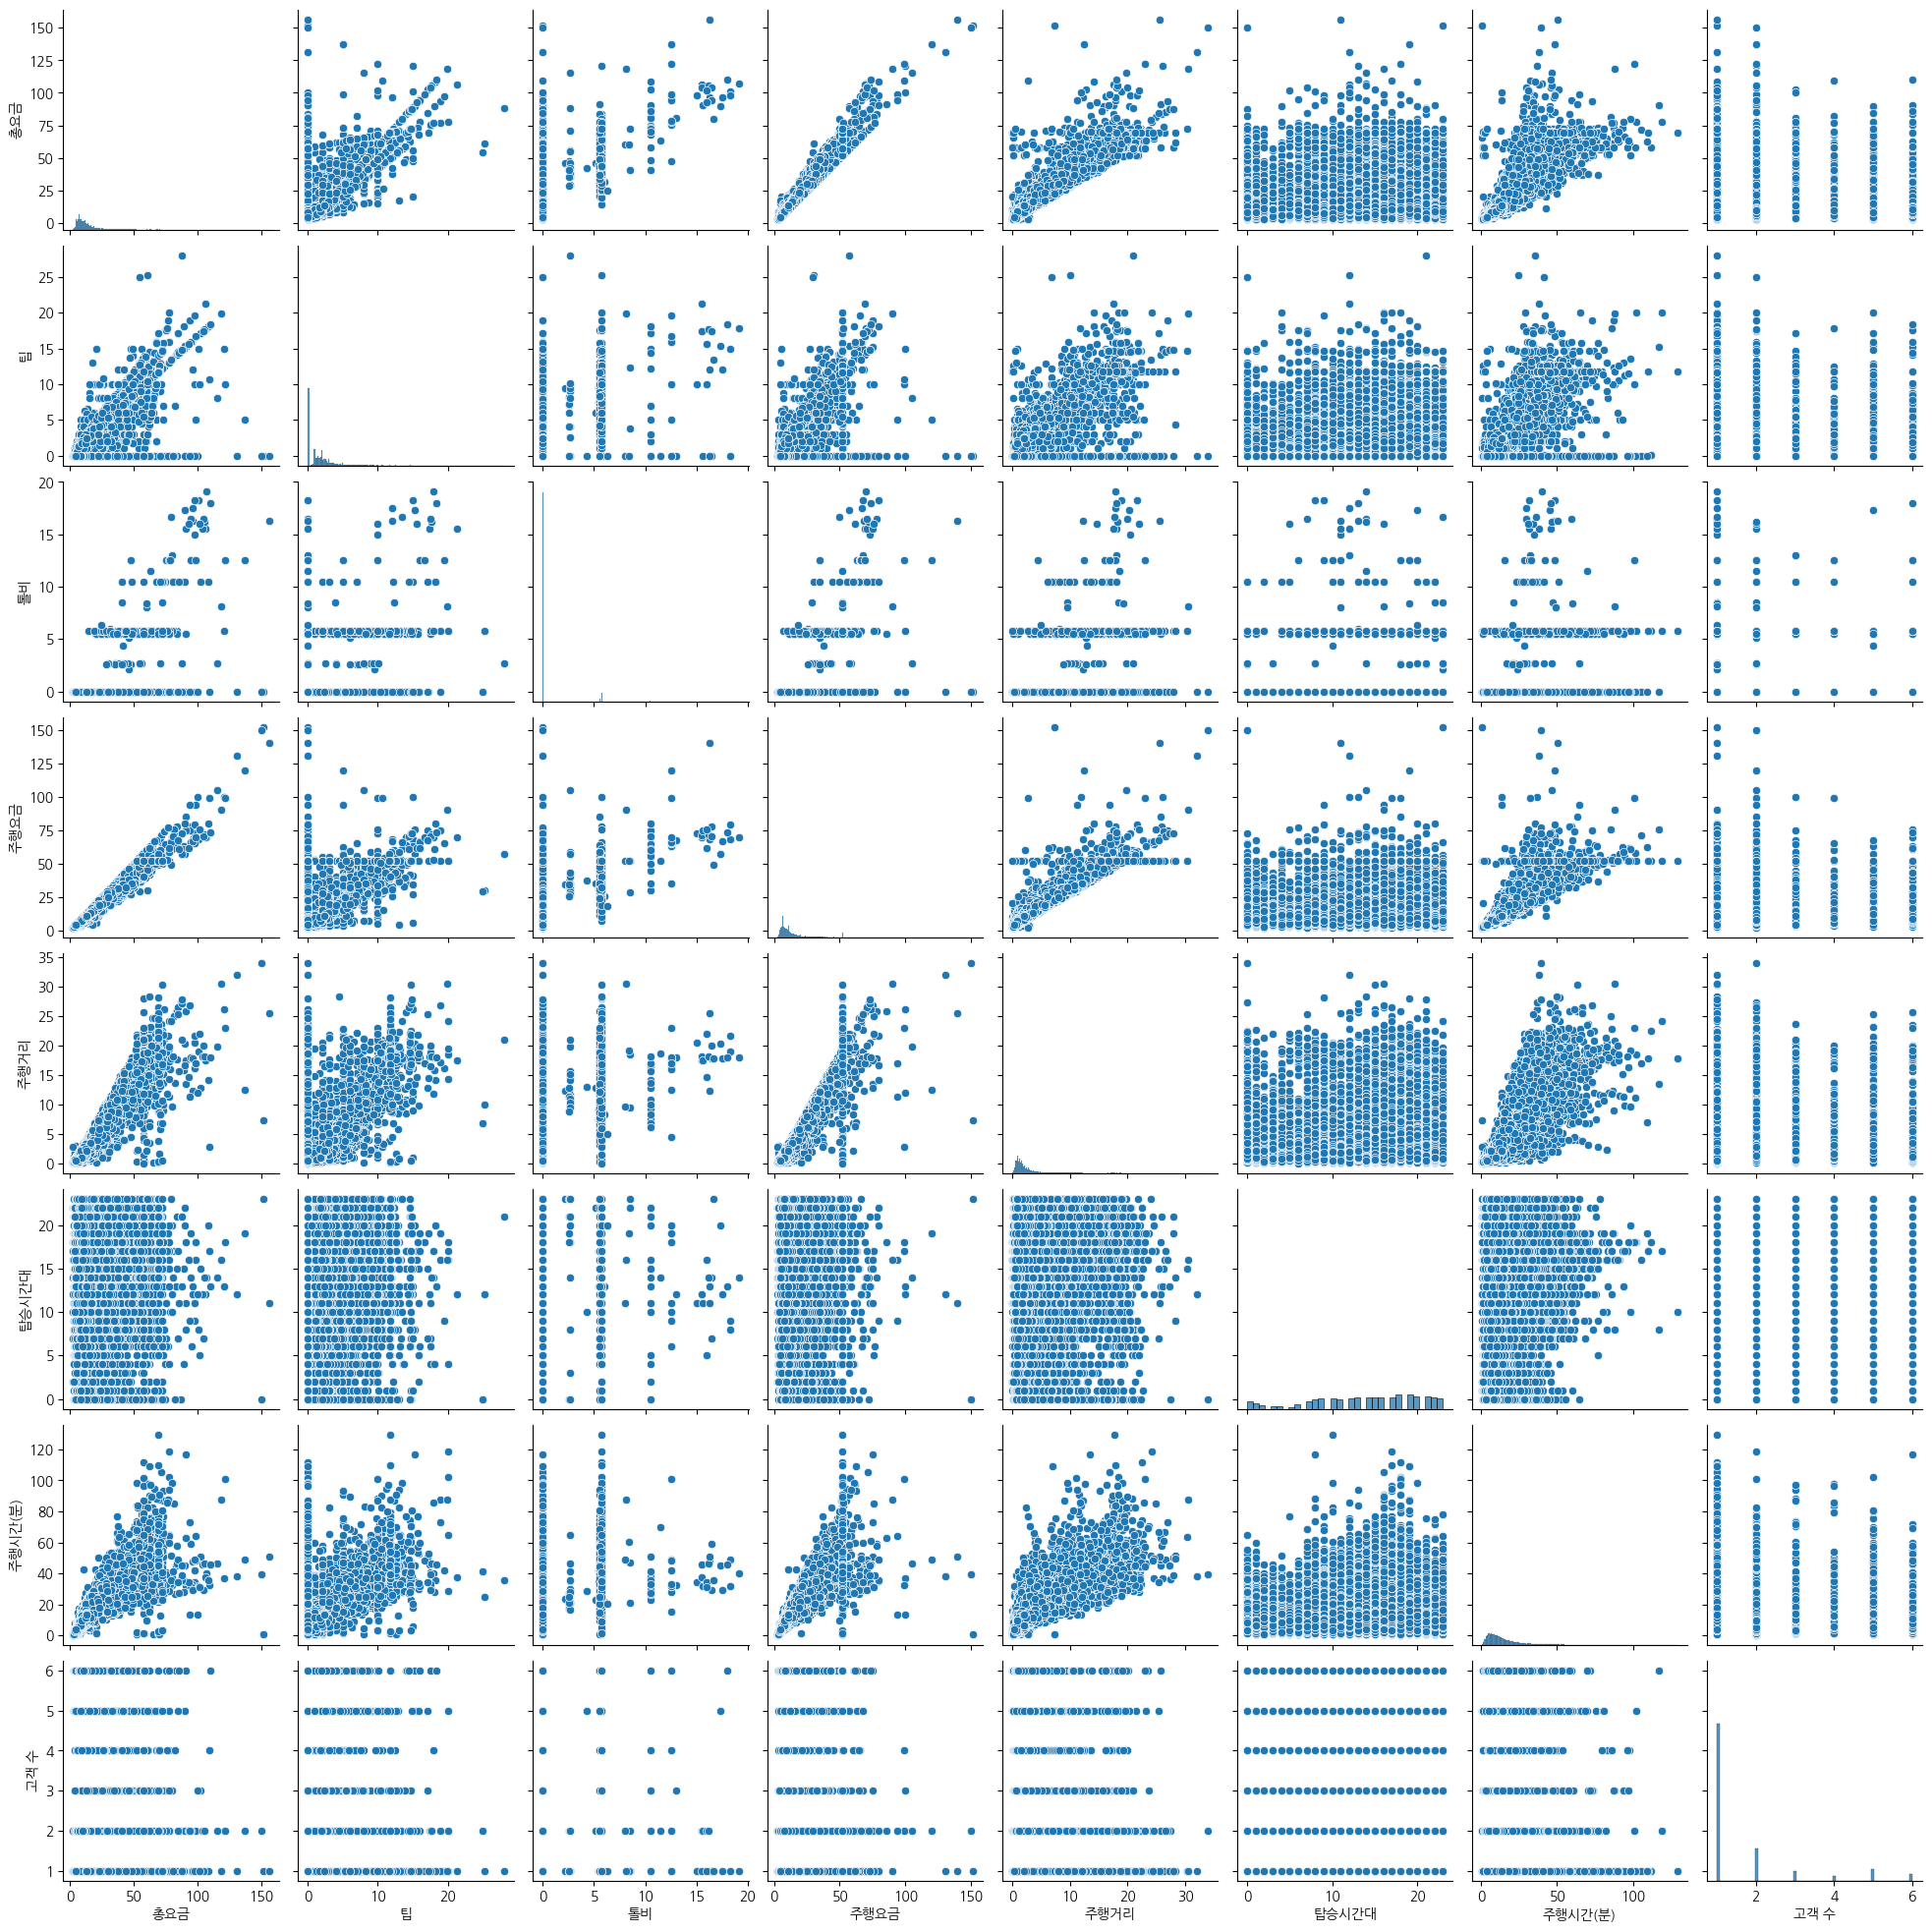

In [116]:
sns.pairplot(taxi_df)

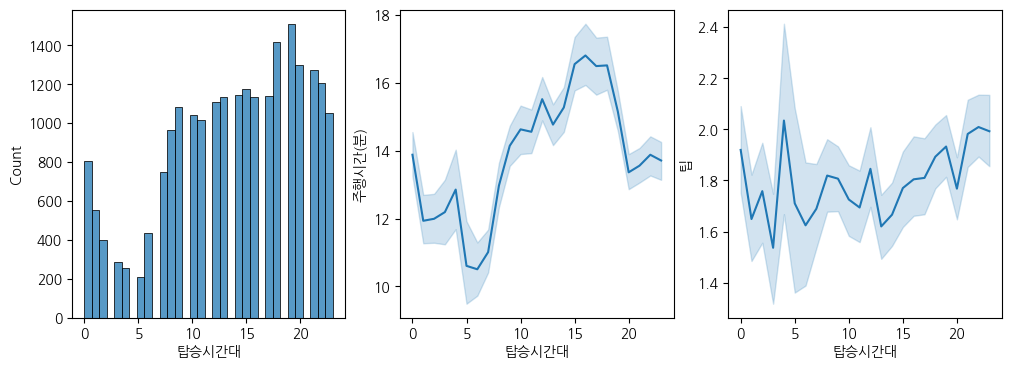

In [124]:
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
sns.histplot(taxi_df, x='탑승시간대', ax=ax1)
sns.lineplot(taxi_df, x='탑승시간대',y='주행시간(분)', ax=ax2)
sns.lineplot(taxi_df, x='탑승시간대',y='팁', ax=ax3)
plt.show()

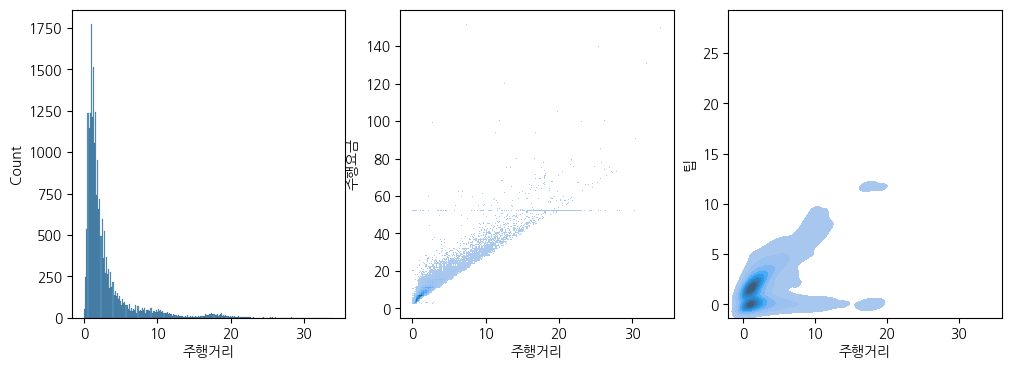

In [155]:
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
sns.histplot(taxi_df, x='주행거리', ax=ax1)
sns.histplot(taxi_df, x='주행거리', y='주행요금', ax=ax2)
sns.kdeplot(taxi_df, x='주행거리', y='팁',fill=True, ax=ax3)
plt.show()

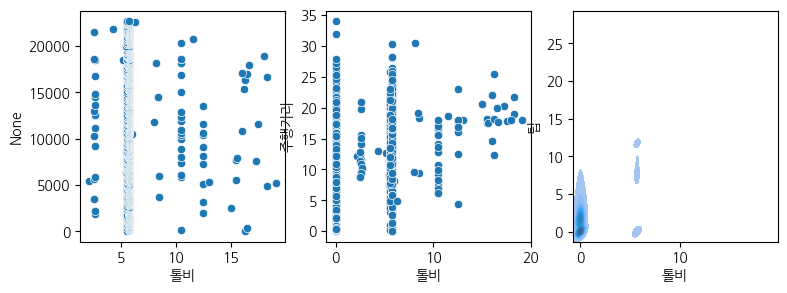

In [167]:
fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
sns.scatterplot(taxi_df[taxi_df['톨비'] != 0], x='톨비',y=taxi_df[taxi_df['톨비'] != 0].index, ax=ax1)
sns.scatterplot(taxi_df, x='톨비',y='주행거리', ax=ax2)
sns.kdeplot(taxi_df, x='톨비',y='팁', fill=True,ax=ax3)
plt.show()

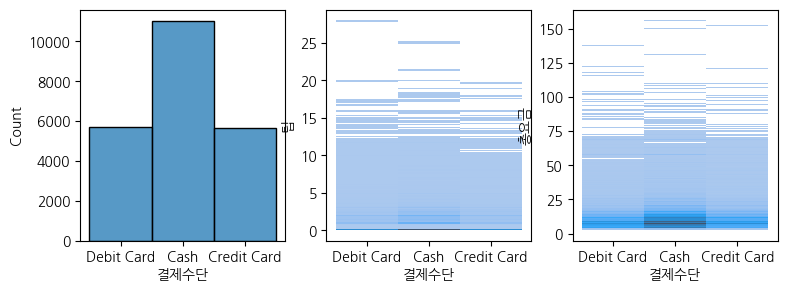

In [172]:
fig=plt.figure(figsize=(9,3))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
sns.histplot(taxi_df, x='결제수단', ax=ax1)
sns.histplot(taxi_df, x='결제수단',y='팁', ax=ax2)
sns.histplot(taxi_df, x='결제수단',y='총요금',ax=ax3)
plt.show()

---------
### 요약
+ 테이터 개선점
  1. **주행거리:주행요금**은 비례관계를 띠지만, 주행거리가 4(miles)가 넘어감에도 주행요금이 3을 넘지 않는 경우가 존재  
    비정상적인 상황이라고 판단하였으며, 데이터의 해석을 왜곡할 수 있으므로 제거
  2. **주행시간(분):주행거리**는 비례관계를 띠지만, 100분이 넘어감에도 5(miles)를 넘기지 못하는 데이터 등이 존재  
     도로가 상당히 막히는 경우 발생할 수는 있으나, 일반적인 상황은 아니기에 제거
+ 시각화 개선점  
  아래와 같은 상황이 시각화된 그래프의 이해를 방해하므로 우선 제거하였다가, 후 모델링을 할 때 다시 적용할 것
  1. **주행시간(분)** 이 150분을 넘는 상황
  2. **총요금**이 170을 넘는 상황
  3. **팁**이 40을 넘는 상황
+ 발견
  1. **주행요금** 관련 그래프에서 값 52에 선형관계가 생기는 것으로 보아, 특정 상황에서는 **최저 요금**을 적용함을 발견  
     주행거리 : 약 30(miles) or 주행시간 : 약 130분 까지 운행을 한 기록이 존재
  2. **탑승시간대**는 18\~20시가 제일 많으며, 주행시간(분)은 15~18시가 제일 높다.  
     팁은 4시, 21\~0시까지 높은 값을 가진다.
  3. 사람들은 대부분 짧은 거리(최빈값 :1)에서 택시를 자주 탄다.
  4. 주행거리에 따라 팁을 더 주는 경향이 있지만, 주지 않는 경우도 많다.
  5. 톨게이트 비용과 팁은 0.5의 상관관계를 보이지만, 톨게이트비가 발생한다고 팁을 더 주는 것인지는 명확하지 않다.
  6. 상관관계의 대소비교를 통해 보았을 때, 사람들은 주행시간이 긴 것보다 주행거리가 길 때에 팁을 더 많이 주는 경향이 있다.
+ 인사이트
  1. 출근 시간보다 퇴근 시간의 수요가 높으므로, 요금을 다르게 책정하거나 공급을 다르게 적용하여 가격을 조정할 여지가 있다.
  2. 짧은 거리를 자주 타고 다니므로, 짧은 거리에서 충분한 요금을 받을 수 있도록 단계별 가격 책정을 한다면 수익을 올릴 수 있다.  
     (가격이 오른다면, 수요가 떨어질 가능성도 고려해야한다.)

-----
# 회고
1. scatterplot, lineplot, histplot 이외에도 '어떻게 하면 분포와 밀도를 동시에 표현할 수 있을까'를 고민하면서 그래프를 찾아볼 수 있었다. : kdeplot, hexbin, jointplot, 불투명도 조절
2. 데이터를 가공하는 데에 있어서 배경지식{데이터를 어디서(지역, 국가), 어떻게(어떠한 집단 등)}을 알면 더 큰 도움이 될 수 있다는 것을 깨달았다.
3. 어떤 목적을 가지고 분석하냐에 따라 버리고, 만드는 피쳐가 명확해지기 때문에 무작정 진행하는 것보다는 계획을 세우고 접근해야 할 것 같다.
4. 다른 변수들과의 상관관계를 따질 때에는 인코딩을 나중에 해야한다. 인코딩 과정은 독립x-종속y 관계를 추정하기 직전에 하는 것이 적절하다.
5. 시각화와 모델링은 조금 다른 접근이 필요하다는 것을 느꼈다. 데이터를 통해서 풀이가 가능하더라도 시각화를 위해서는 잠시 빼두는 것이 필요하기도 해보인다.
6. 나만의 진행 과정이 다른 사람들에게는 이해하기 힘들 수 있으며, 특히 향후에는 여러 유관부서와의 협업을 해야하기 때문에 데이터에 익숙하지 않은 사람들을 이해시키는 과정이 필요할 것으로 보인다.
7. 남들이 생각하지 못하는 피쳐를 만든다는 것은 생각보다 많은 시간이 소요될 것 같다. 내가 속해 있는 직무의 성격에 따라서 때로는 새로운 인사이트보다 빠른 의사결정이 중요할 수도 있겠다는 생각을 했다.
8. 상관관계를 너무 믿으면 안 된다는 느낌도 받았다. 너무 높은 값은 사실상 같은 지표를 의미하고 있는 것 같았고, 관계가 있다고 나오더라도 특정 영역에서만 해당하는 경우도 있는 것 같았다.
9. 계속해서 수정을 하는 경우, 컴퓨터를 자주 옮겨다니는 경우에는 Github에 업로드로 올리는 것보다 연동을 해서 하는 게 훨씬 빠르겠다는 생각을 했다. 다시 공부해야지..

### 원-핫 인코딩

In [ ]:
taxi_df['결제수단'].value_counts()
# 가짓수 이상 없음
taxi_df = pd.get_dummies(taxi_df, columns=['결제수단'])